In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
plt.rc('axes', lw = 2, labelsize = 15)
from astropy.io import fits
import astropy.units as u
from astropy.constants import codata2014 as const
print(const.h.cgs)

6.62607004e-27 erg s


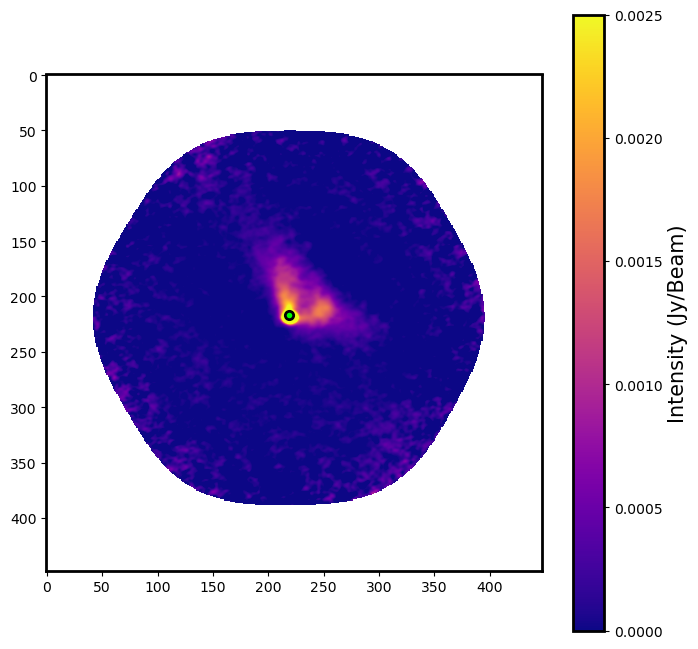

In [2]:
filestring = './HOPS10_Continuum.fits'


with fits.open(filestring) as hdul:

    image_data = hdul[0].data
    header = hdul[0].header
    
    bmin = header['BMIN'] ## in deg
    bmaj = header['BMAJ'] ## in deg
    cdelt1 = header['CDELT1'] ## in deg/pix
    cdelt2 = header['CDELT2'] ## in deg/pix
    
    
plt.figure(figsize = (8,8))    
plt.imshow(image_data, cmap='plasma', vmin = 0.00, vmax = 0.0025)
cb = plt.colorbar()
cb.set_label('Intensity (Jy/Beam)')

x, y = 219, 217
plt.scatter(x,y, color = 'lime', edgecolor = 'black', lw = 2)

Assuming bmin and bmaj are in pixels...

In [3]:
beamsize = (np.pi * np.abs(bmin / cdelt1) * np.abs(bmaj / cdelt2)) / (4 * np.log(2))

In [4]:
print('Beamsize = %.0f'%beamsize)

Beamsize = 45


In [5]:
from photutils import CircularAperture, aperture_photometry

fluxes = []
for rsize in np.arange(1,150):
    ctr = [(x, y)]
    aperture = CircularAperture(ctr, rsize) ## radius 25

    # Perform aperture photometry
    phot_table = aperture_photometry(image_data, aperture)
    flux = phot_table['aperture_sum'][0]

    fluxes.append(flux)

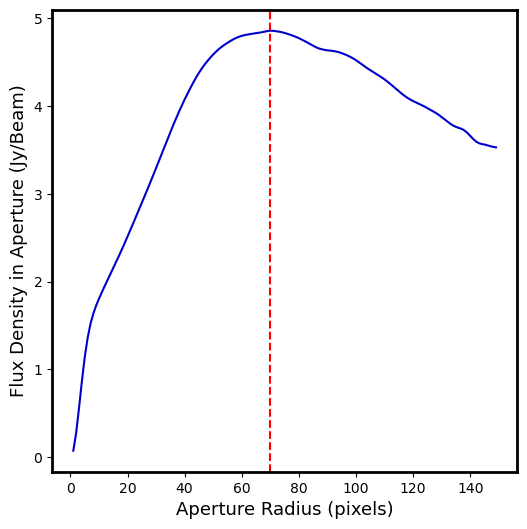

In [6]:
plt.figure(figsize = (6,6))
plt.plot(np.arange(1,150), fluxes, color = 'mediumblue')
plt.xlabel('Aperture Radius (pixels)', fontsize = 13)
plt.ylabel('Flux Density in Aperture (Jy/Beam)', fontsize = 13)
plt.axvline(70, color = 'red', ls = '--')
plt.savefig('flux_curve.pdf', bbox_inches = 'tight')

In [7]:
apsize = np.arange(1,150)[np.argmax(fluxes)]
# apsize = 15
aperture = CircularAperture(ctr, apsize) 

# Perform aperture photometry
phot_table = aperture_photometry(image_data, aperture)
flux = phot_table['aperture_sum'][0]

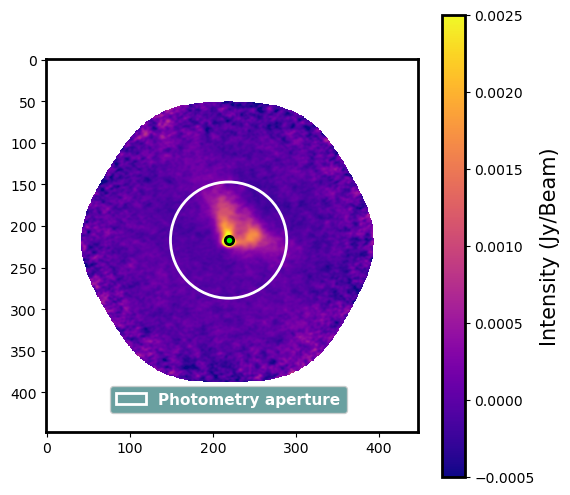

In [8]:
plt.figure(figsize = (6,6))    
plt.imshow(image_data, cmap='plasma', vmin = -0.0005, vmax = 0.0025)
cb = plt.colorbar()
cb.set_label('Intensity (Jy/Beam)')

x, y = 219, 217
plt.scatter(x,y, color = 'lime', edgecolor = 'black', lw = 2)


ap_patches = aperture.plot(color='white', lw=2,
                           label='Photometry aperture')

handles = ap_patches
plt.legend(loc=(0.17, 0.05), facecolor='#458989', labelcolor='white',
           handles=handles, prop={'weight': 'bold', 'size': 11})
plt.savefig('Aperture.pdf', bbox_inches = 'tight')

In [9]:
nu = 232.6 * u.GHz
k = const.k_B.cgs
h = const.h.cgs
c = const.c.cgs
T = 46 * u.K
d = (420 * u.pc).to(u.cm)
kappa = 0.23 * u.cm**2 / u.g
fnu = ((flux / beamsize) * u.Jy).to(u.erg/u.s * u.cm**-2 * u.Hz**-1)

bnu = (((2 * nu**2 * (k*T)))/c**2).to(u.erg / u.cm**2)

Mass = fnu  * d**2 / (kappa * bnu)

In [10]:
Mass.to(u.g).to(u.Msun) 

<Quantity 0.00513454 solMass>

In [11]:
Mass.to(u.g).to(u.Msun) * 100

<Quantity 0.51345438 solMass>